# Project Overview

The goal of this exercise is to debunk all claims that Manchester United FC is not the most relevant club in English Football. Over the past decade, the club has gone through some rough times as it has struggled to adapt to fundamental changes in management and identity. Regardless of this, it is important for all followers of English football to be reminded of the fact that Manchester United has always been, still is, and will always be a top influencer of football in the Premier League and globally!

# Problem Description

I want to study and visualize the influence Manchester United FC has had on English Football. I will go on to propose hypotheses, assess models and arrive at a data backed conclusion about the club's influence. 

# Subject Matter Expertise

In bulleted format, describe the subject matters that will help you explore your topic. Example:
 
For some context, the English Premier League is arguably the top tier of professional football. Over the years, global football has witnessed the rise and fall of dominant clubs. Manchester United has performed at the top level in this tier and I will utilize the following data science techniques to make exactly this point:

1. Data Analysis
2. Data Visualization
3. Hypothesis Testing
4. Sampling and Empirical Distribution
5.  Testing Hypotheses


As a soccer enthusiast, I have actively followed the Premier League for years so I have some general context on this topic. I scraped data from different sites, read a couple of articles and followed instincts from knowledge collated over time. All of these left me better prepared to meaningfully contribute in this regard.

# Assumptions
List any assumptions you may have about the topic. 
`Assumptions are a thing that is accepted as true or as certain to happen, without proof.`

Manchester United is a dominant force in English Football. The English Premier League is the most competitive professional football league. Influence is directly related to performance output and can be measured by impact on and off the pitch.

Please note that for the entirety of this project, 'football' refers to the sport for which the name is no misnomer, more commonly known in some settings as 'soccer'.

# Steps to Explore the Topic and Problem

List the steps you're going to take to explore the topic using the data sources you identify and the techniques you already know. Please list them as step 1, step 2, step 3. Example:

1. Web-scrape data from Wikipedia.
2. Web-scrape data from the official Premier League site.
3. Clean up scraped data.
4. Show the relationship between English teams and titles won.
5. Show the relationship between English teams and other success metrics.
6. Visualize some of these interesting findings.
7. Calculate median points average for teams in English Football.
8. Show that Manchester United qualifies as an outlier, indicating that they are so far above the rest.
9. Come up with null and alternative hypotheses
10. Assess models
11. Make informed conclusions on the club's influence in this regard.


# Data Sources:

In bulleted format, list where you will get data from. Data sources must include one existing data source and web-scrapted source. Example:

With the instuctor's permission, I have opted to use two web scraped sources instead.

1. A compilation of all Premier League winners from the inception of the competition: 'https://en.wikipedia.org/wiki/List_of_Premier_League_seasons'

2. A collation of points acquired by Premier League teams in the competition's history: 'https://www.statbunker.com/alltimestats/AllTimeLeagueTable?comp_code=EPL'

In [110]:
from datascience import *
import pandas as pd
import re
import requests
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
 
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Data Exploration
Describe the data using what you know. For larger datasets may have to pull out columns that are of interest to you.

In [111]:
# Opening and reading the article's url.
url = "https://en.wikipedia.org/wiki/List_of_Premier_League_seasons"
html = urlopen(url)
soup = BeautifulSoup(html.read(),'html.parser')
table = soup.find_all('table') 
df = pd.read_html(str(table))

# the table we want is in index 3, so we reinitialize the dataframe to that and display.
premier_league_stats = pd.DataFrame(df[3])
#premier_league_stats

In [112]:
# Opening and reading the article's url.
url = "https://www.statbunker.com/alltimestats/AllTimeLeagueTable?comp_code=EPL"
html = urlopen(url)
soup = BeautifulSoup(html.read(),'html.parser')
table = soup.find_all('table') 
df = pd.read_html(str(table))
[]
# the table we want is in index 0, so we reinitialize the dataframe to that and display.
premier_league_points = pd.DataFrame(df[0])
#premier_league_points

# Data Cleaning
Show techniques you use to reduce impact of outliers, drop missing, or null values (if any)

In [113]:
premier_league_stats.isnull().values.any()
premier_league_points.isnull().values.any()

False

In [114]:
premier_league_points.drop(columns=['#', 'More'], inplace=True)
#premier_league_points

In [115]:
# Rename the columns so that they're more intuitive 
premier_league_stats.columns = ['Season', 'Champions', 'Champions League', 'Europa League', 
                'Relegated', 'Promoted', 'Top Scorer(s)', 'Goals'] 

# Remove unwanted whitespace and other extraneous characters from relevant columns 
premier_league_stats['Champions'] = premier_league_stats['Champions'].apply(lambda x: x.strip('[g]'))
premier_league_stats['Champions'] = premier_league_stats['Champions'].apply(lambda x: x.rstrip())
premier_league_stats['Champions League'] = premier_league_stats['Champions League'].apply(lambda x: x.rstrip('#'))
premier_league_stats['Relegated'] = premier_league_stats['Relegated'].apply(lambda x: x.replace('[f]', ''))
premier_league_stats['Relegated'] = premier_league_stats['Relegated'].apply(lambda x: x.strip('[l]'))

# The cells with multiple teams have concatenated those teams as one string, making it hard to distinguish them
# for later processing. This inserts a new line character between teams in such cases and makes the table easier
# to work with. 
def split_teams(bad_string):
    index = 0
    good_string = ""
    while index < len(bad_string)-1:
        if bad_string[index].isalpha() and bad_string[index+1].isupper():
            good_string += bad_string[index] + "\n"
            index += 1 
            continue 
        good_string += bad_string[index]
        index += 1
    good_string += bad_string[-1]
    return good_string 

premier_league_stats['Champions League'] = premier_league_stats['Champions League'].apply(lambda x: split_teams(x))
premier_league_stats['Europa League'] = premier_league_stats['Europa League'].apply(lambda x: split_teams(x))
premier_league_stats['Relegated'] = premier_league_stats['Relegated'].apply(lambda x: split_teams(x))
premier_league_stats['Promoted'] = premier_league_stats['Promoted'].apply(lambda x: split_teams(x))
premier_league_stats['Top Scorer(s)'] = premier_league_stats['Top Scorer(s)'].apply(lambda x: split_teams(x))

# The goals column has a lot of unwanted characters, I use regular expressions here to clean it up. 
def fix_goals(input_string):
    return re.sub('\[.*\]','', input_string)

premier_league_stats['Goals'] = premier_league_stats['Goals'].apply(lambda x: fix_goals(x))

In [116]:
#premier_league_stats

# Describe the Data Using Descriptive Stats
Use descriptive stats to tell us about your data. Must include mean, median, and mode where applicable. Also must talk about normality of data.

Remember what `standard deviation`, `mean`, `central tendency`, and `variance` mean for your data

In [117]:
premier_league_stats.shape

(28, 8)

In [118]:
premier_league_stats.describe()

,Season,Champions,Champions League,Europa League,Relegated,Promoted,Top Scorer(s),Goals
count,28,28,28,28,28,28,28,28
unique,28,8,24,26,28,28,20,15
top,1995–96,Manchester United,—,Leeds United,Aston Villa\nNorwich City\nNewcastle United,Sunderland\nBradford City\nWatford,Thierry Henry,25
freq,1,13,4,2,1,1,4,4


In [119]:
premier_league_points.shape

(49, 11)

In [120]:
premier_league_points.describe()

,P,W,D,L,F,A,GD,Points,Points/Match
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000
mean,447.510204,165.510204,116.489796,165.510204,594.653061,594.653061,0.000000,612.77551,1.193878
std,342.761586,173.387707,87.614240,102.475225,567.059431,387.775631,290.226707,601.13671,0.281771
min,38.000000,5.000000,5.000000,19.000000,37.000000,78.000000,-292.000000,30.00000,0.700000
25%,198.000000,57.000000,53.000000,92.000000,229.000000,323.000000,-142.000000,224.00000,1.040000
50%,316.000000,94.000000,89.000000,138.000000,384.000000,472.000000,-86.000000,380.00000,1.130000
75%,608.000000,192.000000,169.000000,236.000000,708.000000,904.000000,-44.000000,702.00000,1.240000
max,1084.000000,669.000000,307.000000,386.000000,2067.000000,1381.000000,1088.000000,2244.00000,2.070000


# Data Visualization Continued
Use everything from the miniproject 1 to describe the plots you will use to visualize you data. 

Must use histogram, bar charts, and pie charts to describe aspects abou tthe data

Determine if your data is normal or not!



In [121]:
# Collate teams in different contexts so that we can count them effectively
def extract_occurrences(input_array, input_string):
    if len(input_string) < 2:
        return []
    input_array.extend(input_string.split('\n'))
    return input_array

champions_league_qualifications = []
for teams in premier_league_stats['Champions League']:
    champions_league_qualifications = extract_occurrences(champions_league_qualifications, teams)

europa_league_qualifications = []
for teams in premier_league_stats['Europa League']:
    europa_league_qualifications = extract_occurrences(europa_league_qualifications, teams)
    
relegated = []
for teams in premier_league_stats['Relegated']:
    relegated = extract_occurrences(relegated, teams)
    
promoted = []
for teams in premier_league_stats['Promoted']:
    promoted = extract_occurrences(promoted, teams)
# Added to handle an inconsistency in table data that could not have been handled differently 
promoted.extend(promoted.pop().rsplit(' ', 1))

# Convert arrays to dataframe objects to allow for extra functionality 
champions_league_qualifications = pd.DataFrame(data=champions_league_qualifications, columns=['Champions League'])
europa_league_qualifications = pd.DataFrame(data=europa_league_qualifications, columns=['Europa League'])
promoted = pd.DataFrame(data=promoted, columns=['Promoted'])
relegated = pd.DataFrame(data=relegated, columns=['Relegated'])

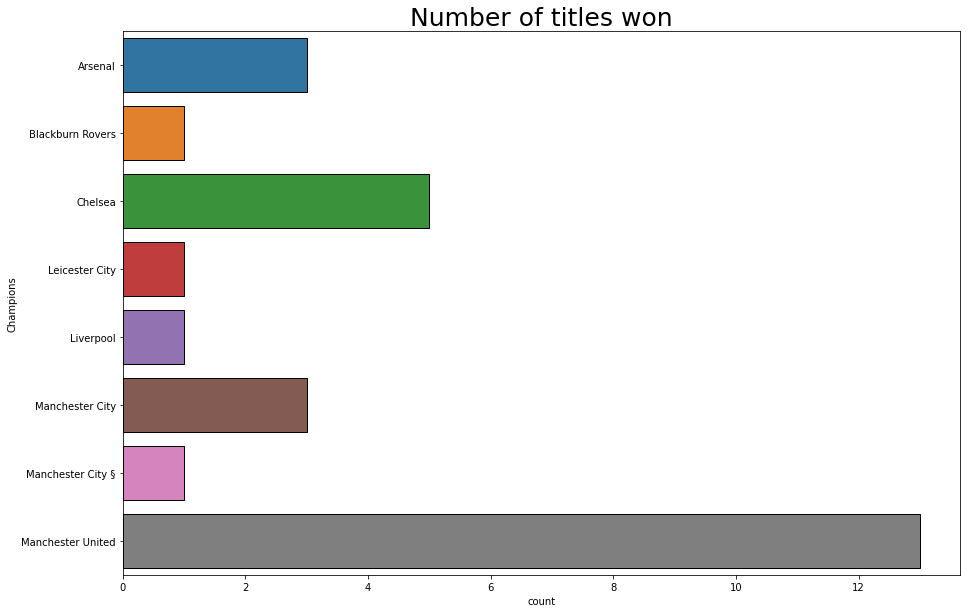

In [122]:
# Make interesting plots :) 
sorted_prem = premier_league_stats.sort_values(by=['Champions'])
sns.countplot(y='Champions', data=sorted_prem)
plt.gcf().set_size_inches(15,10)
plt.title('Number of titles won', size=25)
plt.show()

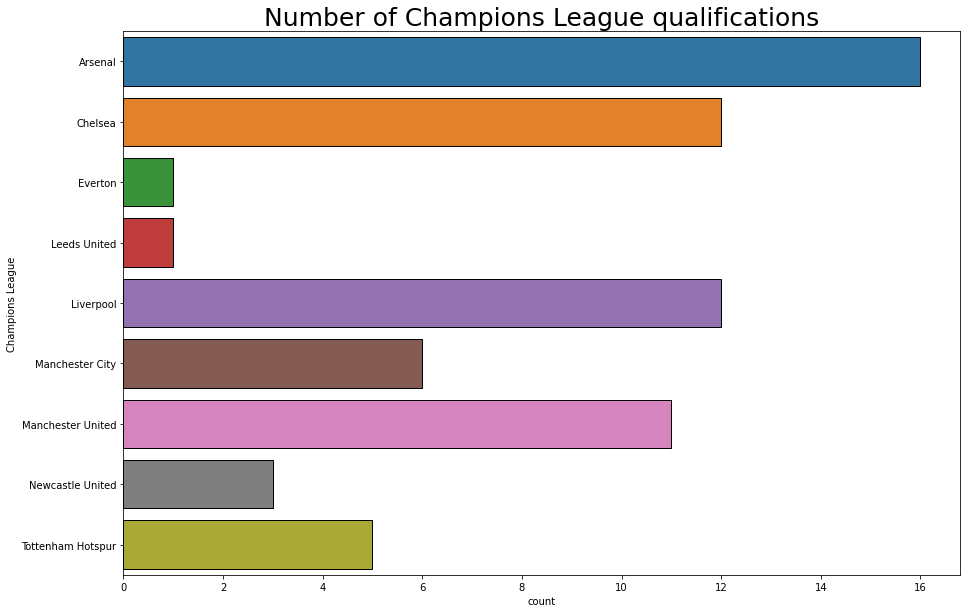

In [123]:
champions_league_qualifications.sort_values(by=['Champions League'], inplace=True)
sns.countplot(y='Champions League', data=champions_league_qualifications)
plt.gcf().set_size_inches(15,10)
plt.title('Number of Champions League qualifications', size=25)
plt.show()

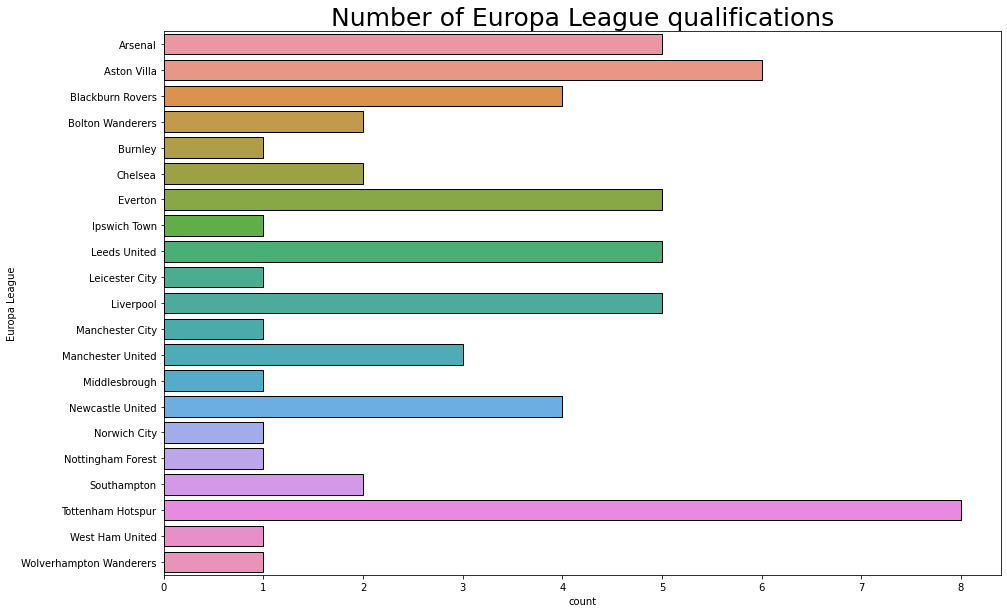

In [124]:
europa_league_qualifications.sort_values(by=['Europa League'], inplace=True)
sns.countplot(y='Europa League', data=europa_league_qualifications)
plt.gcf().set_size_inches(15,10)
plt.title('Number of Europa League qualifications', size=25)
plt.show()

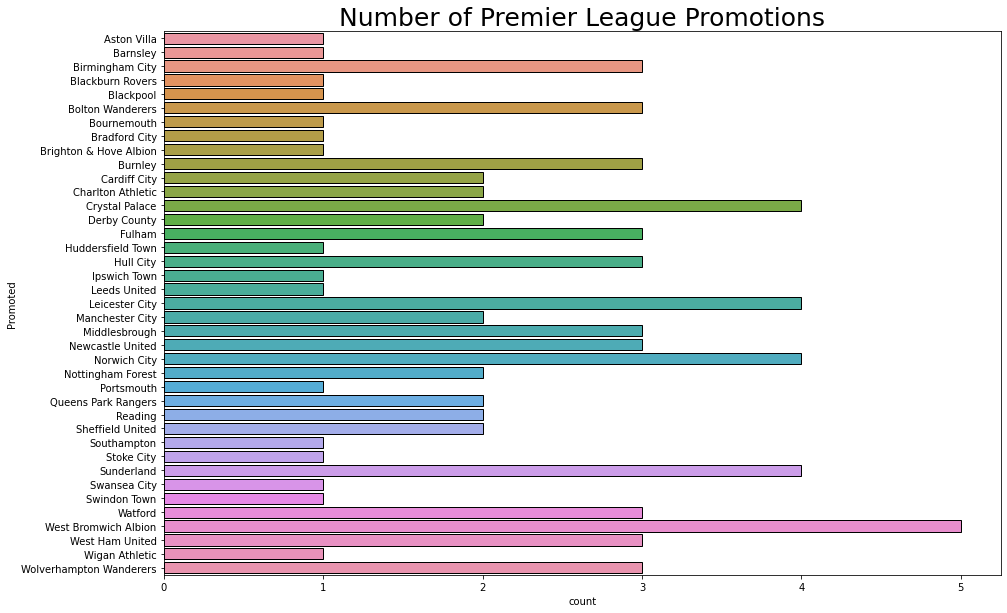

In [125]:
promoted.sort_values(by=['Promoted'], inplace=True)
sns.countplot(y='Promoted', data=promoted)
plt.gcf().set_size_inches(15,10)
plt.title('Number of Premier League Promotions', size=25)
plt.show()

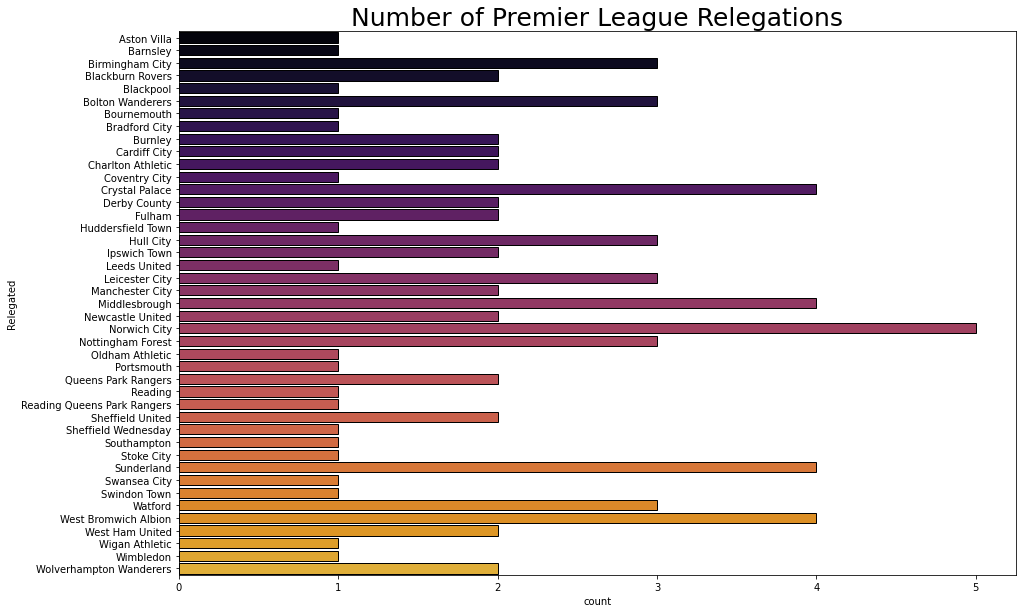

In [126]:
relegated.sort_values(by=['Relegated'], inplace=True)
sns.countplot(y='Relegated', data=relegated, palette=sns.color_palette('inferno', 50))
plt.gcf().set_size_inches(15,10)
plt.title('Number of Premier League Relegations', size=25)
plt.show()

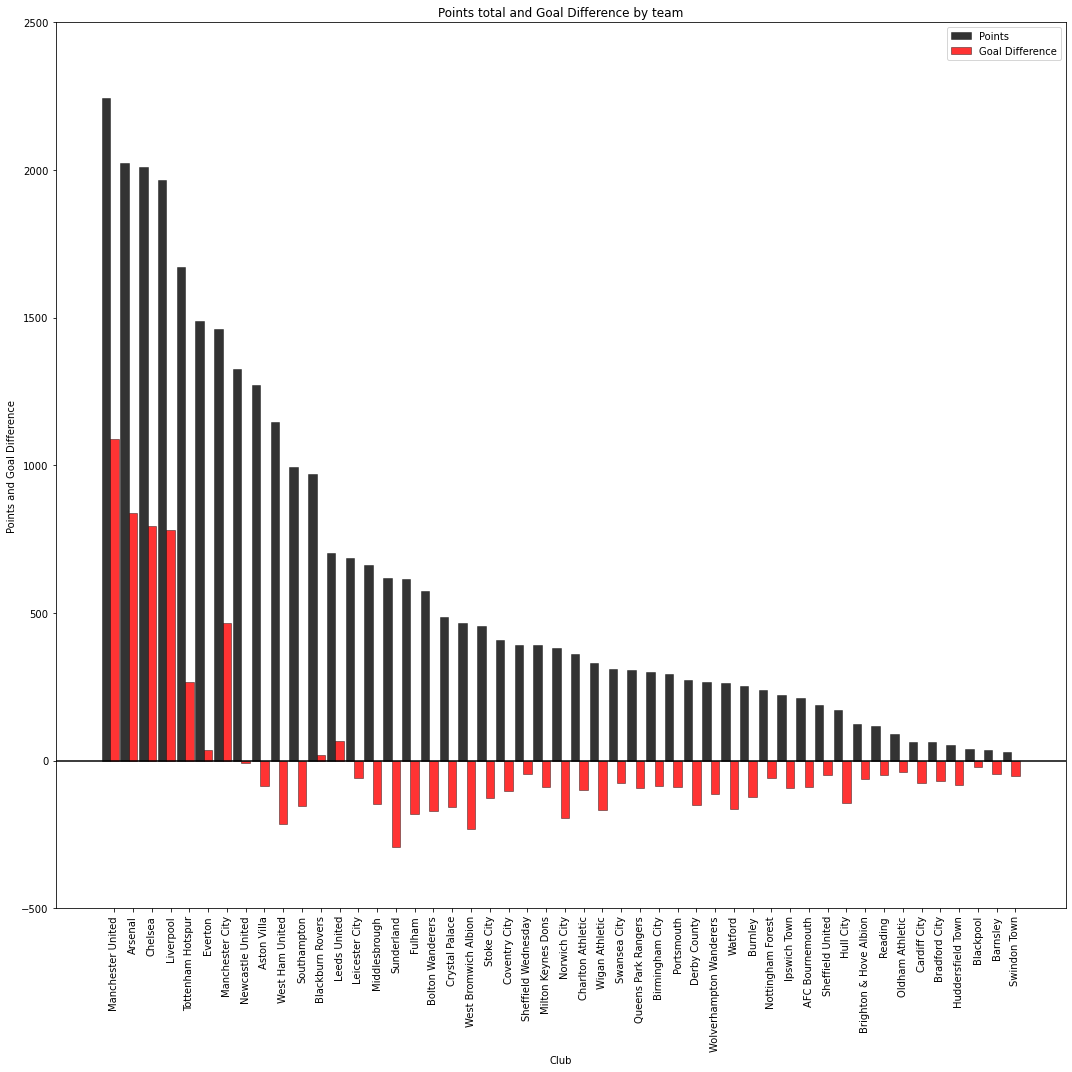

In [127]:
n_clubs = len(premier_league_points)
club_points = premier_league_points['Points']
club_gd = premier_league_points['GD']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_clubs)
bar_width = 0.45
opacity = 0.8

rects1 = plt.bar(index, club_points, bar_width,
alpha=opacity,
color='black', edgecolor = 'black', linewidth = 0.5,
label='Points')

rects2 = plt.bar(index + bar_width, club_gd, bar_width,
alpha=opacity,
color='red', edgecolor = 'black', linewidth = 0.5,
label='Goal Difference')

plt.xlabel('Club')
plt.ylabel('Points and Goal Difference')
plt.ylim(bottom=-500, top=2500)
plt.gcf().set_size_inches(15,15)
plt.title('Points total and Goal Difference by team')
plt.xticks(index + bar_width, premier_league_points['Clubs'])
plt.xticks(rotation=90)
plt.legend()
plt.axhline(y=0, color='black')
plt.tight_layout()
plt.show()

In [128]:
points_median = premier_league_points['Points'].median()
lower_half = premier_league_points.loc[premier_league_points['Points'] < points_median]
upper_half = premier_league_points.loc[premier_league_points['Points'] > points_median]
quartile_1 = lower_half['Points'].median()
quartile_3 = upper_half['Points'].median()
interquartile_range = quartile_3 - quartile_1
high_outlier = quartile_3 + (1.5 * interquartile_range)
low_outlier = quartile_1 - (1.5 * interquartile_range)
print(f'Low outlier: {low_outlier}\nHigh outlier: {high_outlier}')

Low outlier: -710.25
High outlier: 1763.75


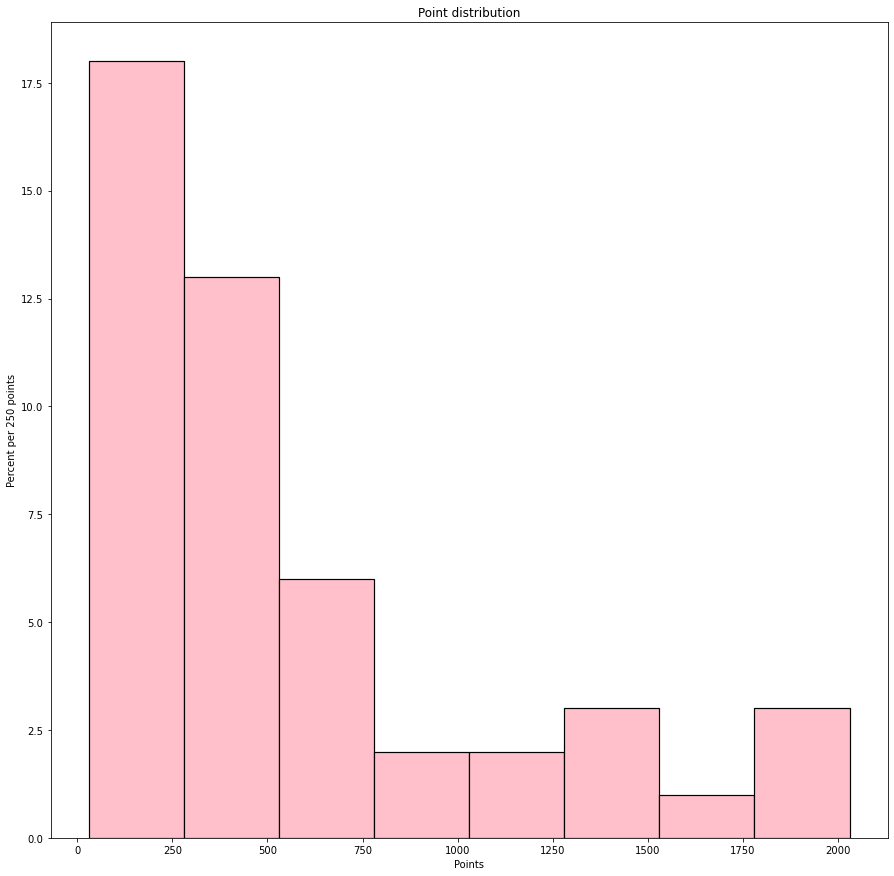

In [129]:
point_bins = np.arange(min(premier_league_points['Points']), max(premier_league_points['Points'])+1, 250)
plt.hist(premier_league_points.Points, point_bins,edgecolor='black', color='pink', linewidth=1.2) # denisty parameter gives us a relative distribution value
plt.xlabel("Points")
plt.ylabel("Percent per 250 points")
plt.title('Point distribution')
plt.gcf().set_size_inches(15,15)
plt.show()

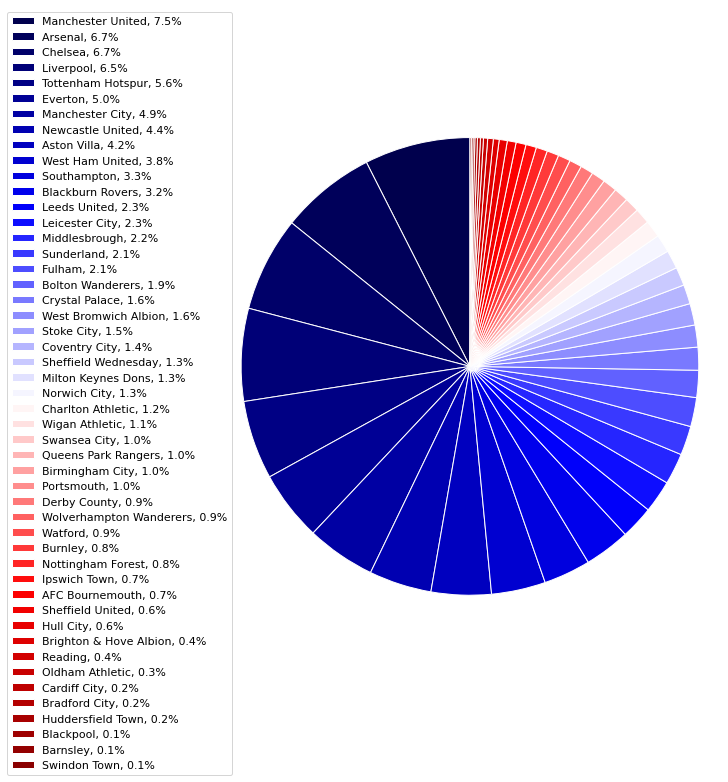

In [130]:
labels = premier_league_points['Clubs']
sizes = premier_league_points['Points']
explode = [0 for _ in range(len(labels))]
explode[0] = 0.1
fig1, ax1 = plt.subplots(figsize=(10, 10))
fig1.subplots_adjust(0.3, 0, 1, 1)
theme = plt.get_cmap('seismic')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
_, _ = ax1.pie(sizes, explode=explode, startangle=90, radius=1800, wedgeprops={"edgecolor":"white",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
ax1.axis('equal')
total = sum(sizes)
plt.legend(loc='upper left', labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)], prop={'size': 11}, bbox_to_anchor=(0.0, 1), bbox_transform=fig1.transFigure)
plt.show()

## Data Sampling

Draw random some samples from your dataset(s)
(If you joined your dataset into one large dataset, only sample randomly from this large dataset)

You must describe how you choose to pick the random samples, i.e. systematic, probablistic sampling

You must describe if you draw random samples with or without replacement

Describe why or why not you chose to randomly draw samples with replacement or without replacement

In [131]:
teams_random_sample = premier_league_points.sample(n=10).sort_values(by='Points/Match')

teams_random_mean = round(teams_random_sample['Points/Match'].mean(),3)
print(teams_random_mean)
teams_random_sample  # Simple random sample drawn with replacement

1.227


,Clubs,P,W,D,L,F,A,GD,Points,Wins%,Points/Match
44,Bradford City,76,14,20,42,68,138,-70,62,18%,0.82
39,Hull City,190,41,48,101,181,323,-142,171,22%,0.90
34,Burnley,235,66,55,114,236,359,-123,253,28%,1.08
26,Wigan Athletic,304,85,76,143,316,482,-166,331,28%,1.09
36,Ipswich Town,202,57,53,92,219,312,-93,224,28%,1.11
27,Swansea City,266,82,66,118,306,383,-77,312,31%,1.17
10,Southampton,818,258,222,338,1004,1159,-155,996,32%,1.22
5,Everton,1084,394,307,383,1417,1381,36,1489,36%,1.37
6,Manchester City,893,420,202,271,1486,1019,467,1462,47%,1.64
1,Arsenal,1084,583,274,227,1910,1071,839,2023,54%,1.87


In [132]:
def systematic_sampling(df, step):
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
teams_systematic_sample = systematic_sampling(premier_league_points, 5)
teams_systematic_sample = teams_systematic_sample.sort_values(by='Points/Match')

teams_systematic_mean = round(teams_systematic_sample['Points/Match'].mean(),3)
print(teams_systematic_mean)

teams_systematic_sample  # Systematic random sample drawn with replacement

1.209


,Clubs,P,W,D,L,F,A,GD,Points,Wins%,Points/Match
45,Huddersfield Town,76,12,17,47,50,134,-84,53,16%,0.70
40,Brighton & Hove Albion,122,28,39,55,119,182,-63,123,23%,1.01
15,Sunderland,608,153,159,296,612,904,-292,618,25%,1.02
30,Portsmouth,266,79,65,122,292,380,-88,293,30%,1.10
25,Charlton Athletic,304,93,82,129,342,442,-100,361,31%,1.19
20,Stoke City,380,116,109,155,398,525,-127,457,31%,1.20
35,Nottingham Forest,198,60,59,79,229,287,-58,239,30%,1.21
10,Southampton,818,258,222,338,1004,1159,-155,996,32%,1.22
5,Everton,1084,394,307,383,1417,1381,36,1489,36%,1.37
0,Manchester United,1083,669,237,177,2067,979,1088,2244,62%,2.07


In [133]:
actual_teams_mean = round(premier_league_points['Points/Match'].mean(),3)
actual_teams_mean

1.194

##### Answer

I believe that systematic random sampling is the way to go given the nature of my table. The table is sorted and I do not want to run the risk of making random selections that aggregate around a certain part of the table. Systematic sampling ensures that I have an even spread of data and a sample that has eliminated bias! Means computed on both samples are quite close to the actual value so both methods suffice but I prefer systematic sampling. I opted for the option of sampling with replacement because I don't want to alter the original table and there's no benefit to using the alternative. 

## Find Probability
Find the probability of two events that must both happen in your data analysis

Find the probablity of an event that doesn't happen using your dataset(s)

Find the probability of event that is equally likely occur. You might have to think about this in regards to your problem that you are exploring



In [134]:
premier_league_teams_20_21 = premier_league_points.iloc[[0,1,2,3,4,5,6,7,8,9,10,12,13,16,18,19,32,34,38,40]]
premier_league_teams_20_21 # A collection of teams currently in the premier league for the 2020/21 season. 

,Clubs,P,W,D,L,F,A,GD,Points,Wins%,Points/Match
0,Manchester United,1083,669,237,177,2067,979,1088,2244,62%,2.07
1,Arsenal,1084,583,274,227,1910,1071,839,2023,54%,1.87
2,Chelsea,1084,582,266,236,1859,1066,793,2012,54%,1.86
3,Liverpool,1084,566,267,251,1877,1095,782,1965,52%,1.81
4,Tottenham Hotspur,1084,467,270,347,1627,1362,265,1671,43%,1.54
5,Everton,1084,394,307,383,1417,1381,36,1489,36%,1.37
6,Manchester City,893,420,202,271,1486,1019,467,1462,47%,1.64
7,Newcastle United,966,360,247,359,1297,1306,-9,1327,37%,1.37
8,Aston Villa,969,330,283,356,1176,1262,-86,1273,34%,1.31
9,West Ham United,928,303,239,386,1127,1341,-214,1148,33%,1.24


In [135]:
probability_man_utd_win_league = 1/len(premier_league_teams_20_21)
print(f'All things being equal, the probability than Manchester United win the league is {probability_man_utd_win_league}.')

probability_liverpool_win_league = 1/len(premier_league_teams_20_21)
print(f'All things being equal, probability than Liverpool win the league is {probability_liverpool_win_league}.\n')

probability_man_utd_lose_league = 1 - (1/len(premier_league_teams_20_21))
print(f'All things being equal, the probability than Manchester United do not win the league is {probability_man_utd_lose_league}.\n')

print(f'All things being equal, probability than any team wins the league is {probability_liverpool_win_league}. Hence, all teams have an equal chance of winning!')

All things being equal, the probability than Manchester United win the league is 0.05.
All things being equal, probability than Liverpool win the league is 0.05.

All things being equal, the probability than Manchester United do not win the league is 0.95.

All things being equal, probability than any team wins the league is 0.05. Hence, all teams have an equal chance of winning!


## Testing Hypotheses

Choose two hypotheses you want to explore in regards to your topic.
Examples:
The state of Montana likes cheesecake as a desert?
Have the demographics of Washington, DC decreased over the past decade?
United States streaming services mainly stream rap or hip/hop?

### Note: Make sure to note the Null and the alternative hypotheses for each of the questions you want to test

_Null Hypothesis 1_: Manchester United FC is the most successful team in English football.

_Alternative Hypothesis 1_: There are more successful teams than Manchester United in English football. 

_Null Hypothesis 2_: Swindon Town is the most successful team in English football.

_Alternative Hypothesis 2_: There are more successful teams than Swindon Town in English football.

## Test Statistics 
For each of your questions list the test statistic that you are going to use to test the hypothesis.

In [136]:
def test_statistic(other_team, base_team):
    return 100*(base_team - other_team) # the test statistic is the difference between points/match for Manchester United and other teams

simulated_statistics = []
manchester_united_points = 2.07
for index, row in premier_league_points.iterrows():
    if index == 0:
        continue
    simulated_statistics.append(test_statistic(row['Points/Match'], manchester_united_points))

print(simulated_statistics)

[19.99999999999997, 20.999999999999975, 25.99999999999998, 52.99999999999998, 69.99999999999997, 42.99999999999999, 69.99999999999997, 75.99999999999997, 82.99999999999999, 84.99999999999999, 68.0, 59.999999999999986, 80.99999999999999, 92.0, 104.99999999999999, 93.0, 90.99999999999999, 94.99999999999997, 105.99999999999999, 86.99999999999999, 90.99999999999999, 82.99999999999999, 82.99999999999999, 99.99999999999997, 87.99999999999999, 97.99999999999997, 89.99999999999999, 95.99999999999997, 94.0, 96.99999999999997, 103.99999999999999, 94.99999999999997, 108.99999999999999, 98.99999999999997, 85.99999999999999, 95.99999999999997, 95.99999999999997, 95.99999999999997, 117.0, 105.99999999999999, 102.99999999999999, 100.99999999999997, 123.0, 125.0, 137.0, 103.99999999999999, 114.99999999999999, 136.0]


In [137]:
simulated_statistics_b = []
swindon_town_points = 0.71
for index, row in premier_league_points.iterrows():
    if index == 48:
        continue
    simulated_statistics_b.append(test_statistic(row['Points/Match'], swindon_town_points))

print(simulated_statistics_b)

[-136.0, -116.00000000000001, -115.00000000000001, -110.00000000000001, -83.0, -66.00000000000001, -93.0, -66.00000000000001, -60.00000000000001, -53.0, -51.0, -68.0, -76.0, -55.00000000000001, -43.99999999999999, -31.000000000000007, -42.99999999999999, -44.99999999999999, -41.000000000000014, -30.000000000000004, -49.0, -44.99999999999999, -53.0, -53.0, -36.00000000000001, -48.0, -38.000000000000014, -46.0, -40.000000000000014, -41.99999999999999, -39.000000000000014, -32.00000000000001, -41.000000000000014, -27.0, -37.000000000000014, -50.0, -40.000000000000014, -40.000000000000014, -40.000000000000014, -19.000000000000007, -30.000000000000004, -33.00000000000001, -35.00000000000001, -13.0, -10.999999999999998, 1.0000000000000009, -32.00000000000001, -21.000000000000007]


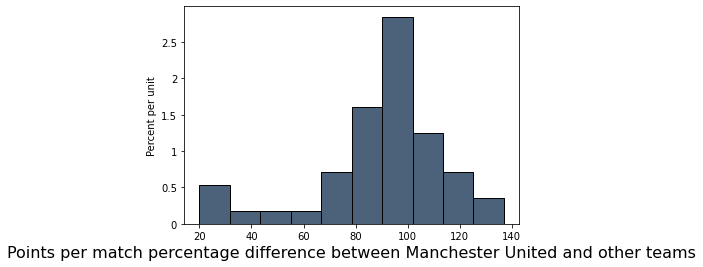

In [138]:
Table().with_column(
    'Points per match percentage difference between Manchester United and other teams', simulated_statistics
).hist()

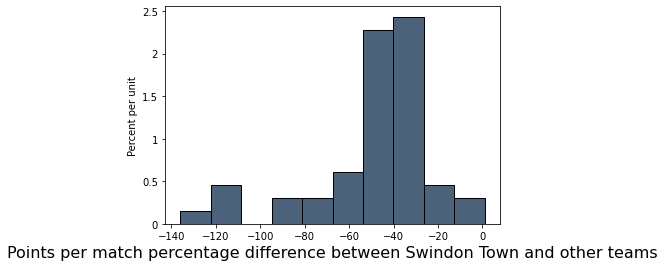

In [139]:
Table().with_column(
    'Points per match percentage difference between Swindon Town and other teams', simulated_statistics_b
).hist()

In [140]:
titles_df = sorted_prem.groupby('Champions').count()
#titles_df

In [141]:
simulated_statistics_2 = []
manchester_united_trophies = 13
other_trophies = []
for index, row in titles_df.iterrows():
    simulated_statistics_2.append(test_statistic(row['Season'], manchester_united_trophies))
    other_trophies.append(row['Season'])

simulated_statistics_2.pop() # Remove Manchester United from consideration
other_trophies.pop()  # Remove Manchester United from consideration
print(simulated_statistics_2)

[1000, 1200, 800, 1200, 1200, 1000, 1200]


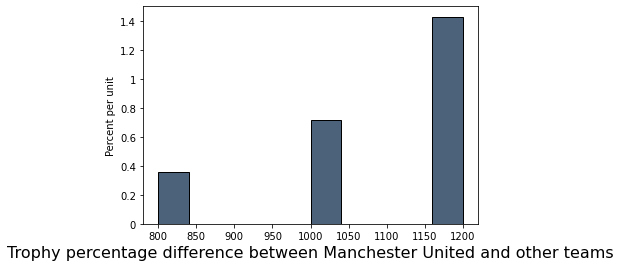

In [142]:
Table().with_column(
    'Trophy percentage difference between Manchester United and other teams', simulated_statistics_2
).hist()

## Observed Values
Show the oberved value of the test statistics

In [143]:
observed_statistic = test_statistic(actual_teams_mean, manchester_united_points)
observed_statistic

87.6

In [144]:
observed_statistic_b = test_statistic(swindon_town_points, actual_teams_mean)
observed_statistic_b

48.4

In [145]:
from statistics import mean

trophy_mean = mean(other_trophies)
observed_statistic_2 = test_statistic(trophy_mean, manchester_united_trophies)
observed_statistic_2

1100

In [146]:
proportion_greater_or_equal = len([x for x in simulated_statistics if x >= observed_statistic])/len(simulated_statistics)
proportion_greater_or_equal

0.6458333333333334

In [147]:
proportion_greater_or_equal_b = len([x for x in simulated_statistics_b if x >= observed_statistic_b])/len(simulated_statistics_b)
proportion_greater_or_equal_b

0.0

In [148]:
proportion_greater_or_equal_2 = len([x for x in simulated_statistics_2 if x >= observed_statistic_2])/len(simulated_statistics_2)
proportion_greater_or_equal_2

0.5714285714285714

# Hypothesis Tests Conclusions
Based on what you found about your topic communicate it to the audience. 

The proportion of simulated statistics is greater than or equal to the observed statistic is greater than 0.05 when poth trophies and points are taken into consideration, this is evidence that supports my model. Based on this, the null hypothesis holds true - Manchester United FC is the most successful team in English football.

In the second case, the proportion is exactly 0 (much less than 0.05) so this is evidence against the hypothesis that Swindon Town is the most successful team in English football. This instead supports the alternate hypothesis, which is what is expected. I decided to try contradicting the null hypothesis this time to spice things up and it worked how I expected it to. This is such a great learning experience!

# Topic Conclusions
Sum up the conclusions about what you did and why it is interesting to you, the public reading your analysis or to a particular population

I wanted to debunk the myth that Manchester United FC is irrelevant in the context English Football. I webscraped two datasets containing historical data from the inception of the English Premier League. I made visualizations and some interesting calculations that reinforce my initial hypothesis. I found that Manchester United has been the top performer in English football since the Premier League began in 1992. They've won the most titles and constantly qualified for European competitions (featuring only the most dominant teams in Europe). They've also done this in some grand style, with the highest win percentage recorded, most goals scored, and least goals conceded playing in the highest tier of English Football the entire time (no relegations or promotions). The numbers truly do not do justice to this remarkable club and I hope these findings do well to silence the critics. 

One interesting thing I did was to calculate the outliers based on total points tally in the Premier League and my findings from this show that MUFC's total places them in the high outlier category. Their level of dominance has placed them far above the rest to the extent that they strongly influence the points distribution. 

Additionally, there is compelling evidence for the null hypothesis that reinforces this idea. It only goes to buttress my stance on the issue. 

This is truly a great club, it should be considered in a league of its own!

# Future Exploration
List what you wish you could do with more knowledge about the topic. Also use this section to save aspects of your data into a new csv file for use in this future exploration. 

In [149]:
"""
I would consider scraping more sites to generate some more compelling data including how MUFC has fared against 
other strong sides in English Football. I would have gone on to visualize this data using scatterplots as I 
think this would have given the best overall depiction of the club's dominance. 
"""

premier_league_stats.to_csv(r'prem_stats.csv')
premier_league_points.to_csv(r'prem_points.csv')